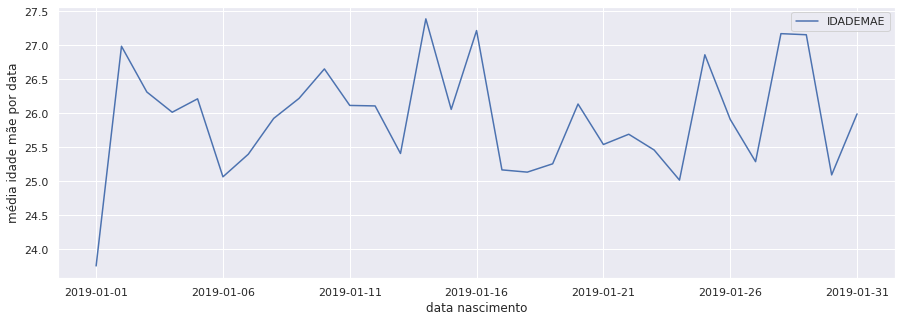

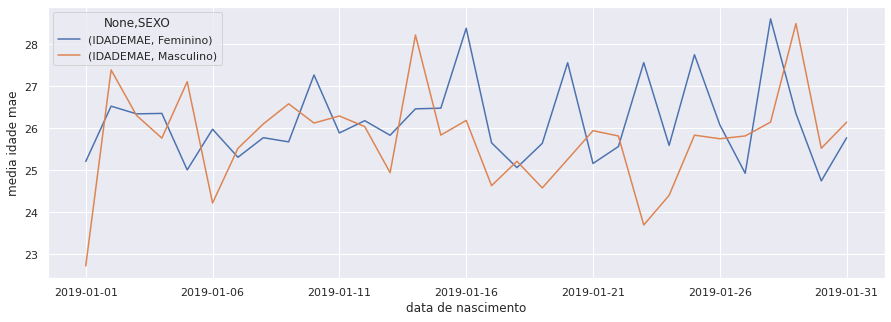

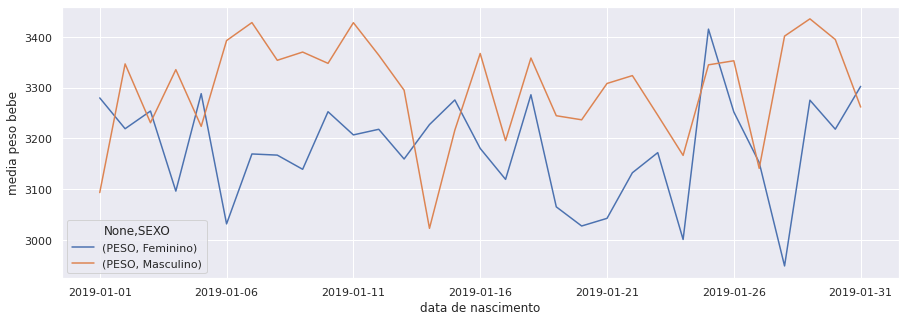

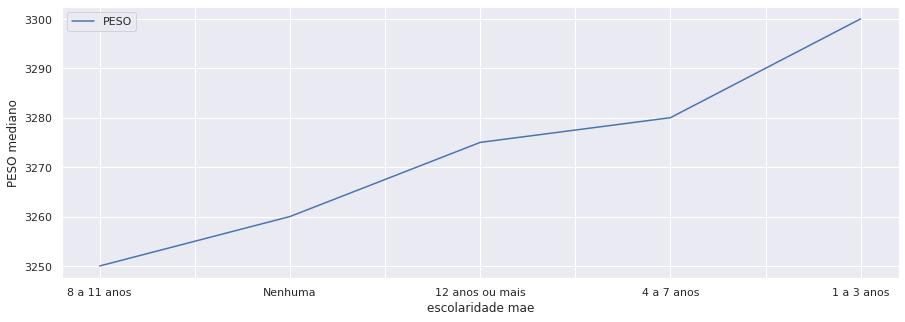

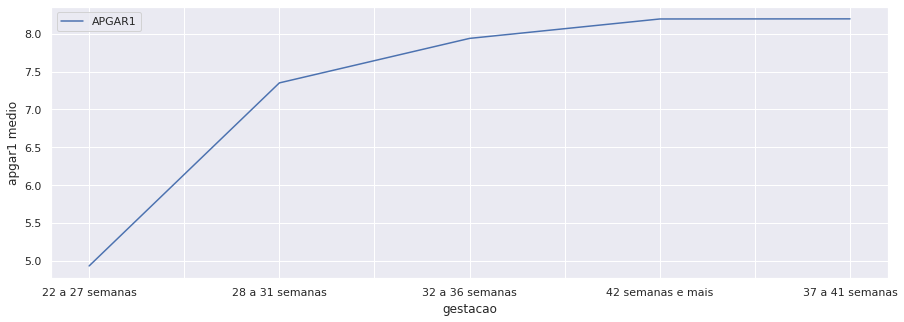

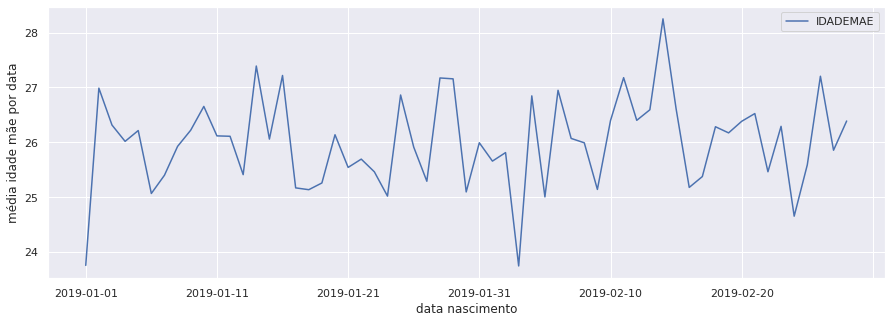

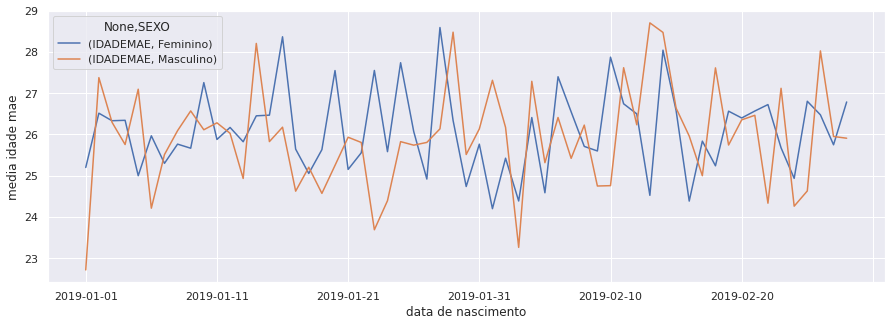

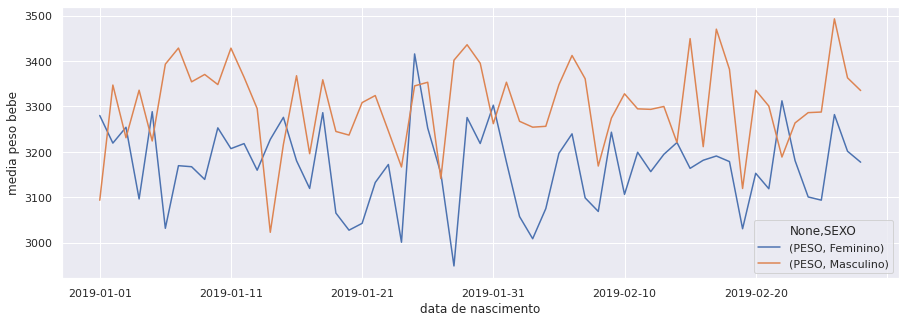

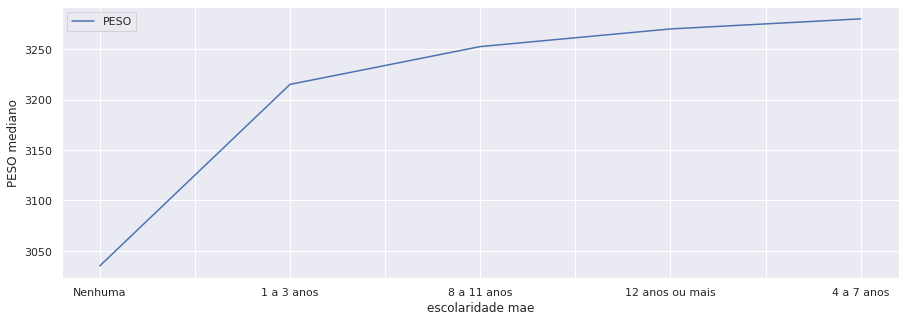

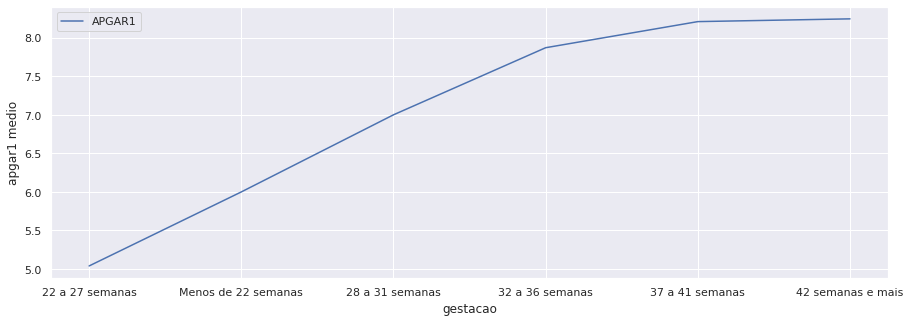

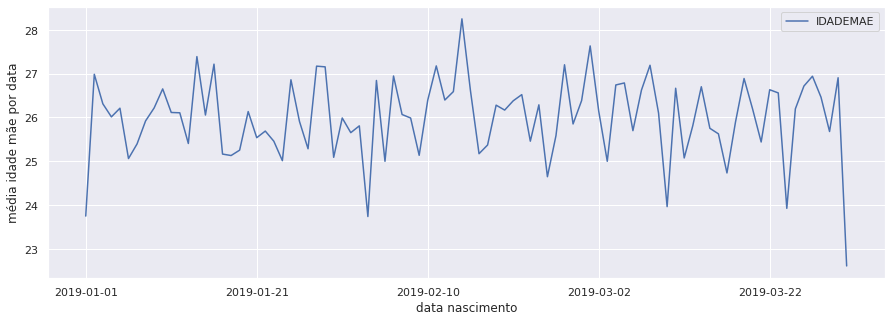

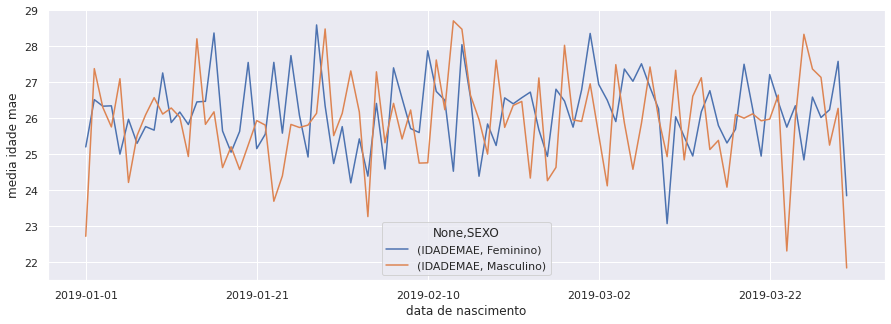

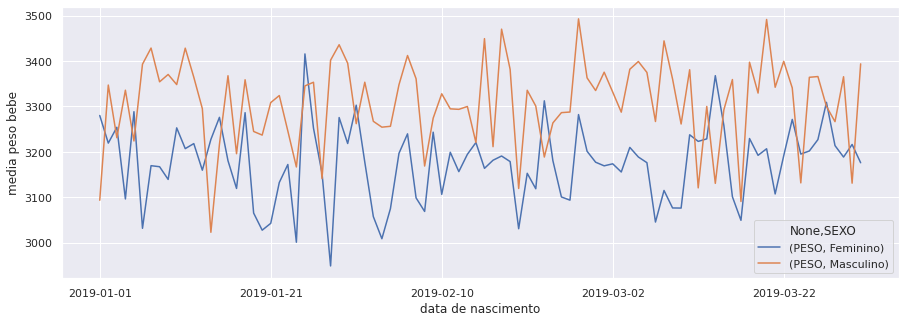

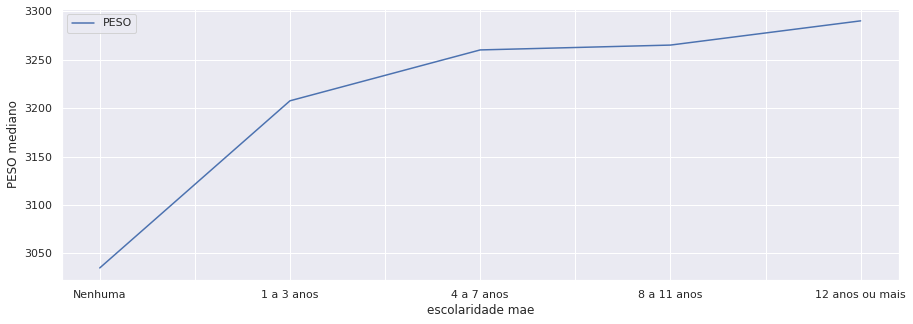

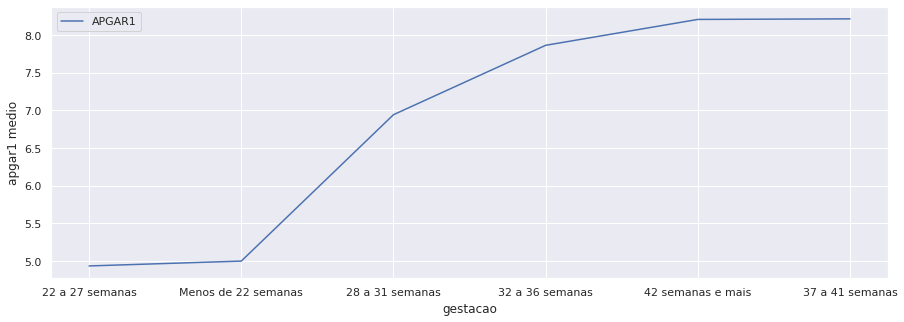

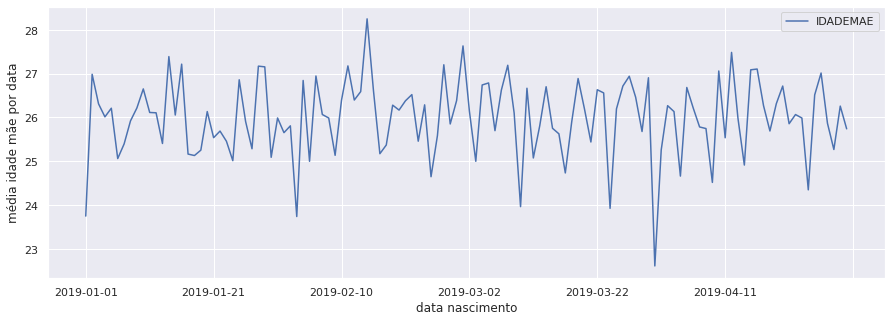

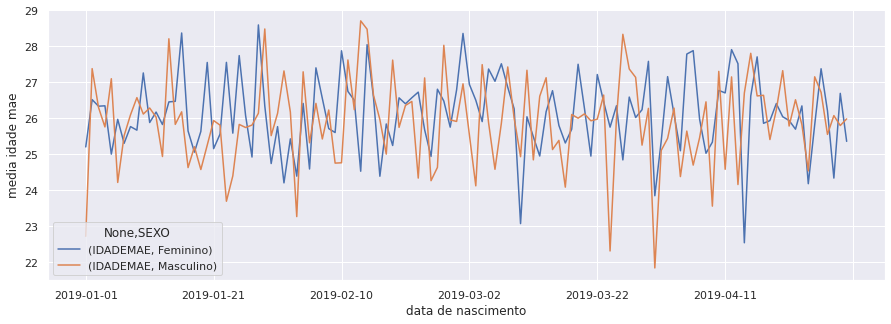

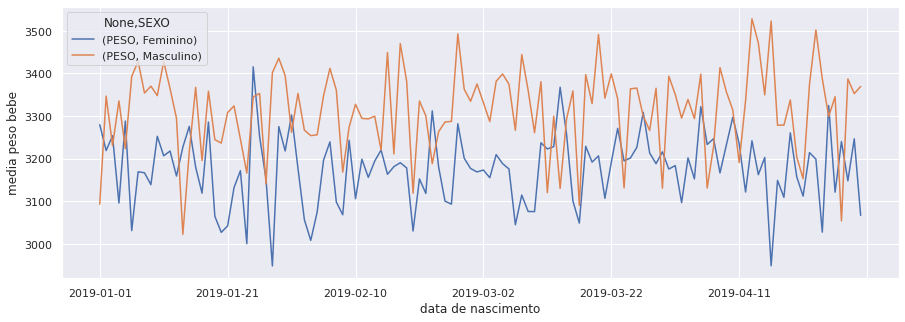

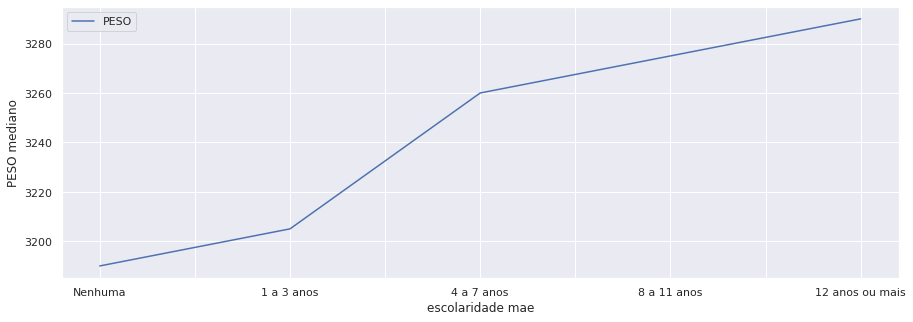

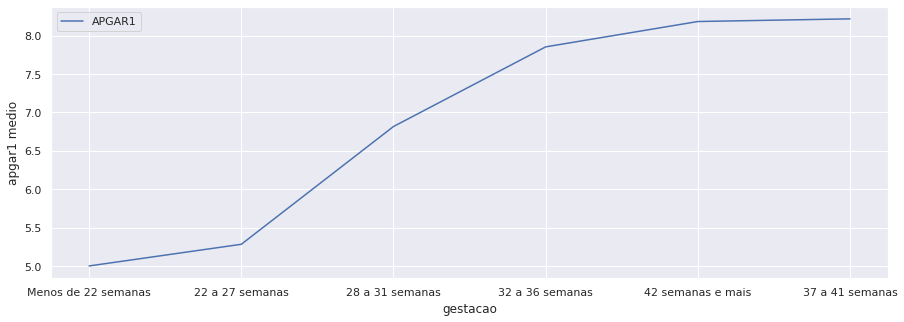

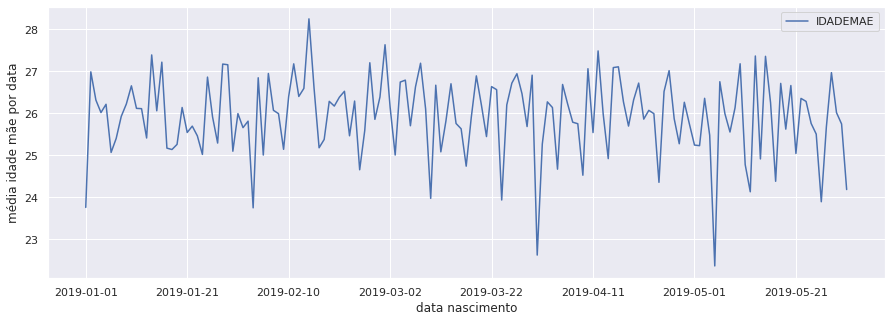

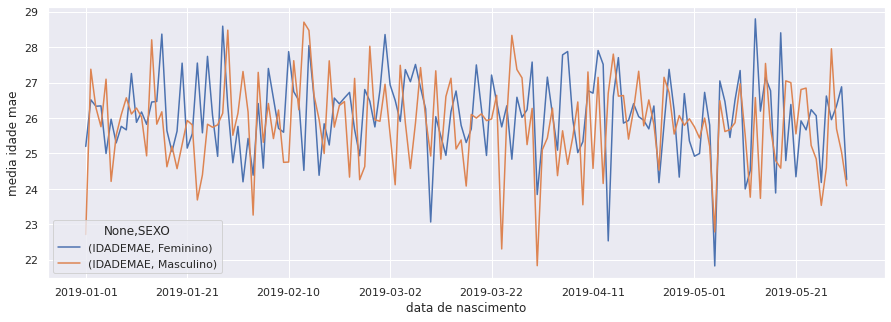

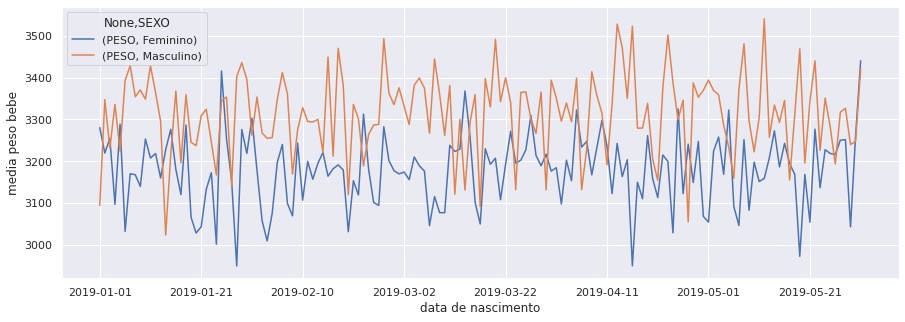

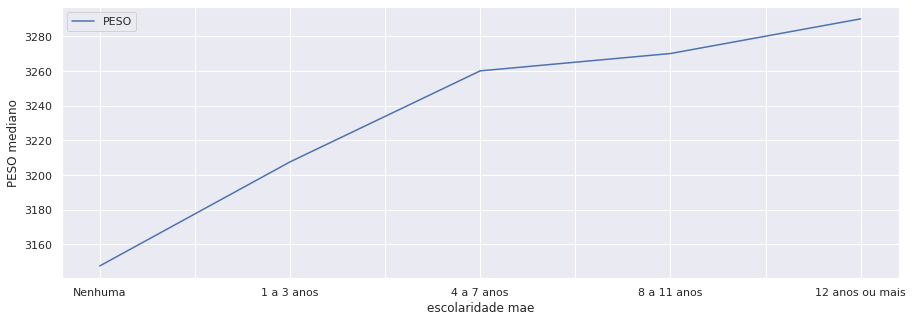

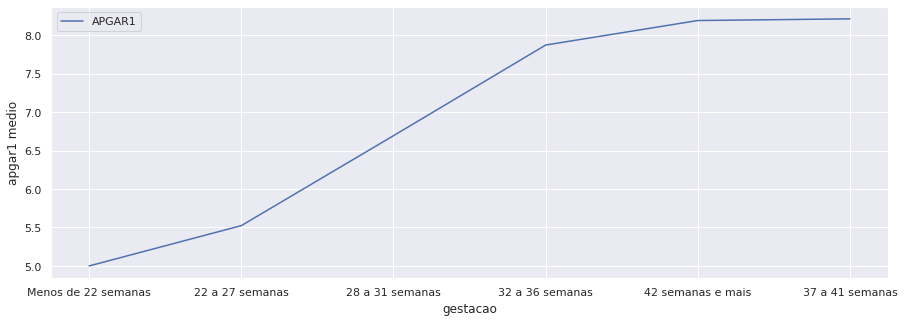

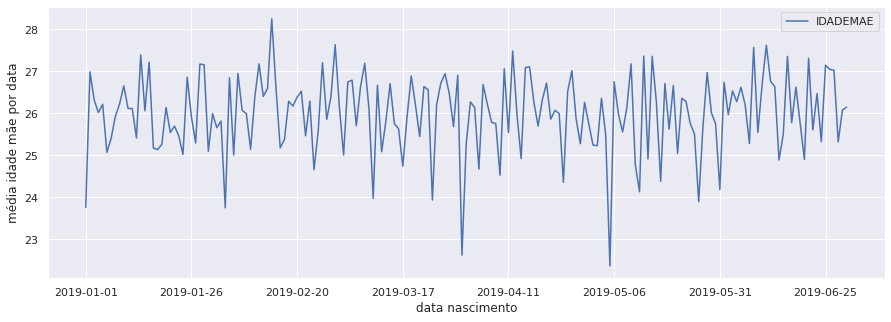

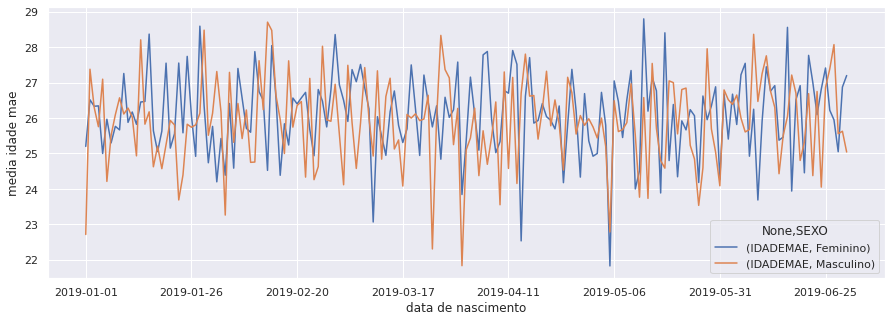

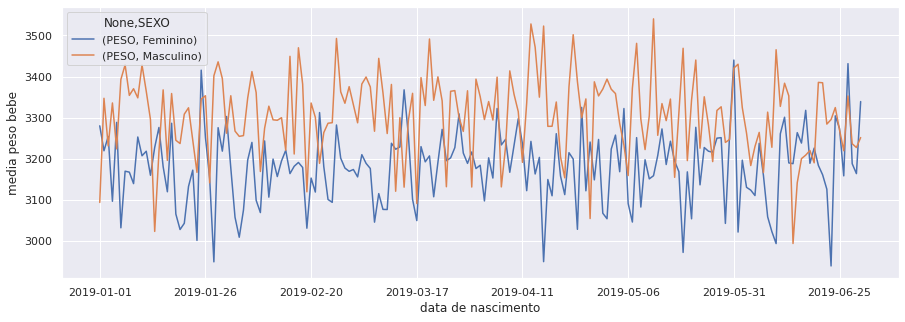

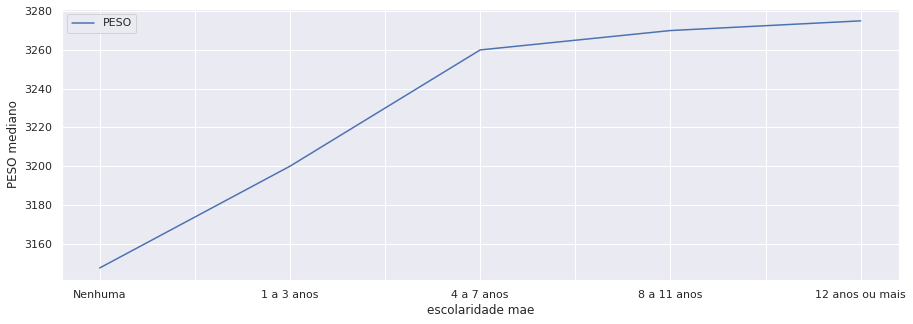

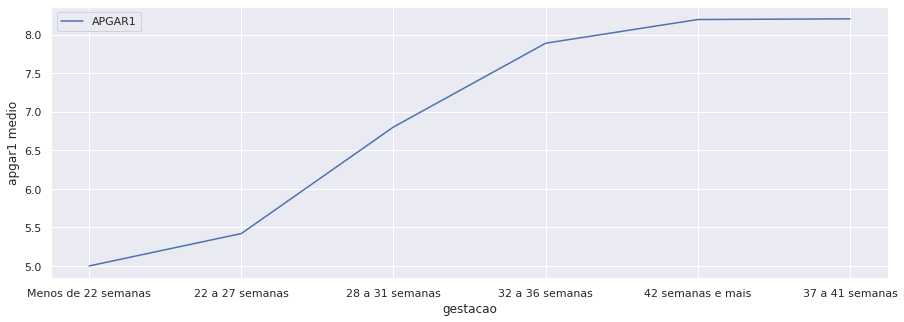

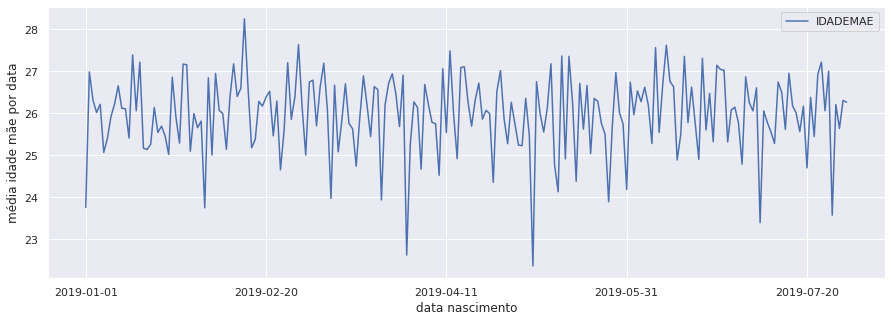

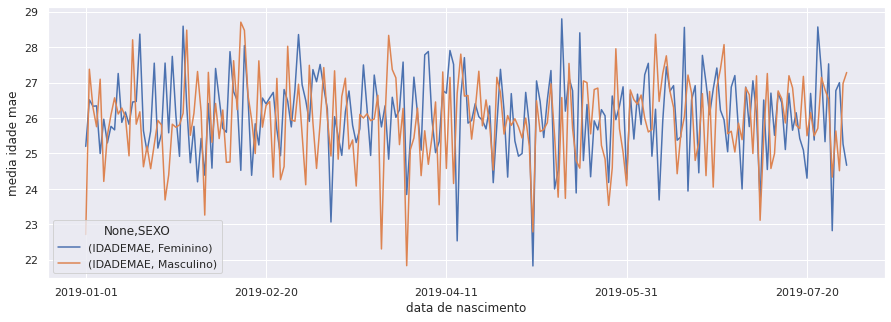

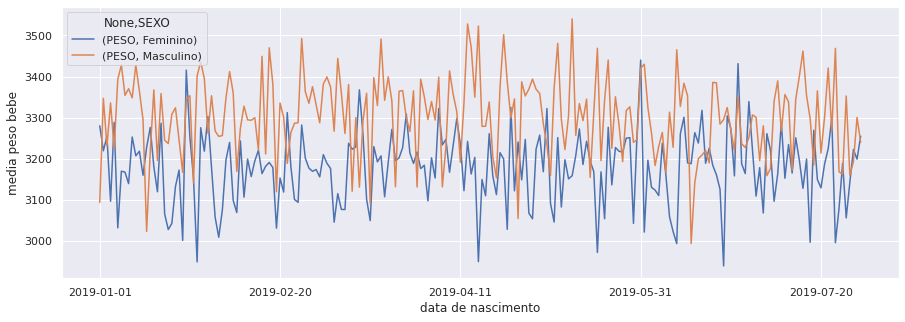

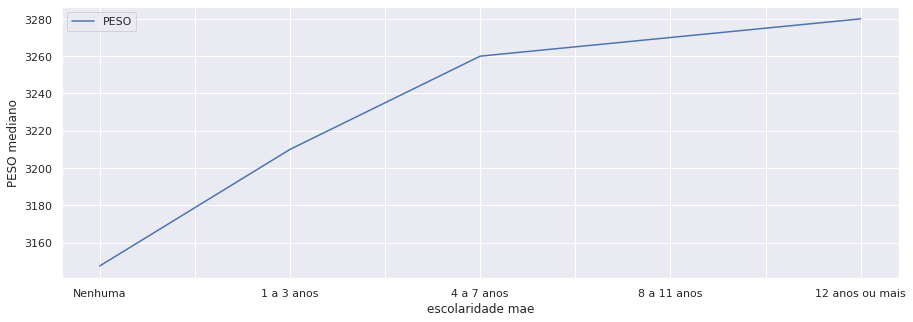

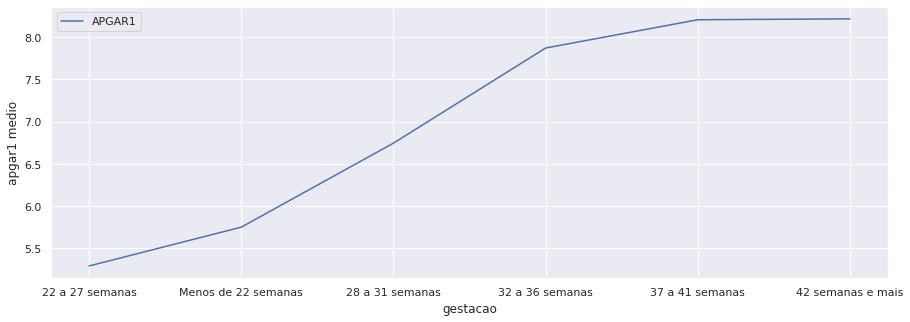

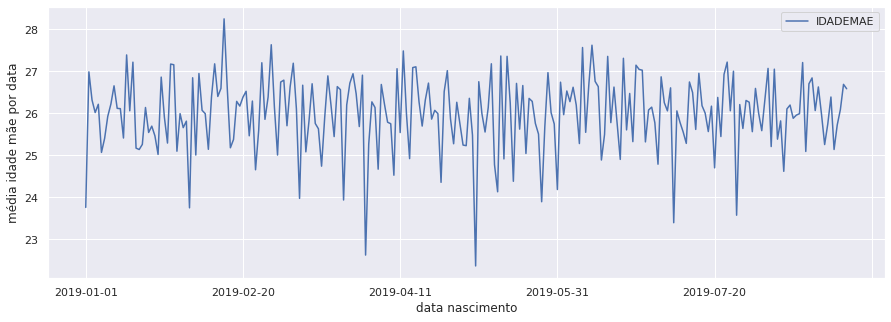

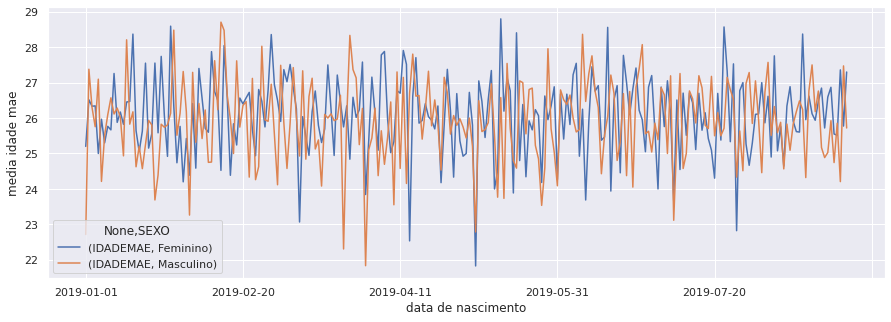

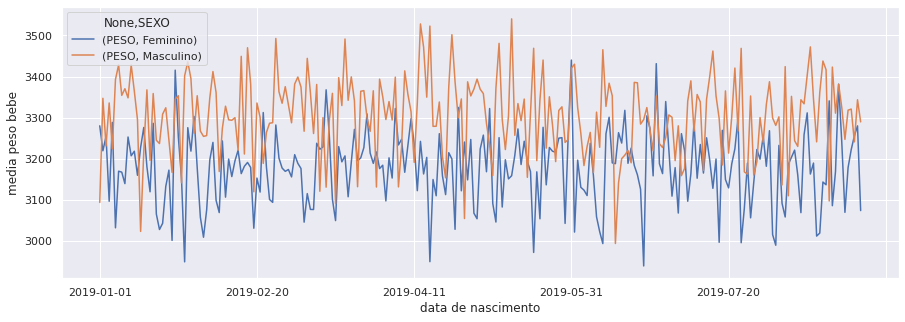

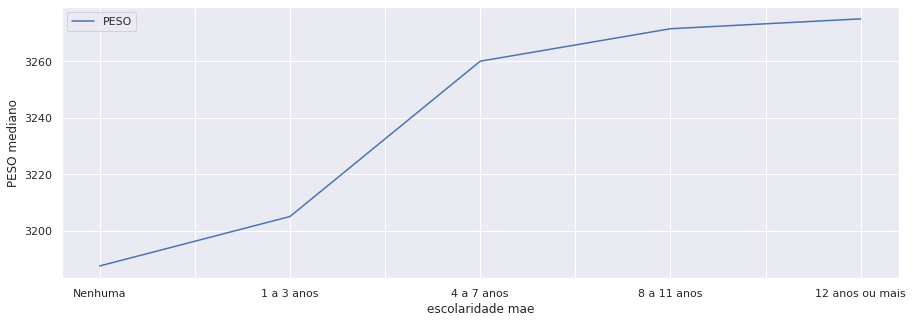

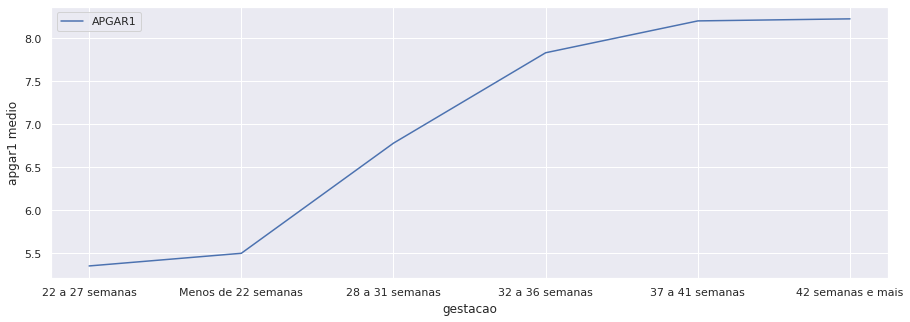

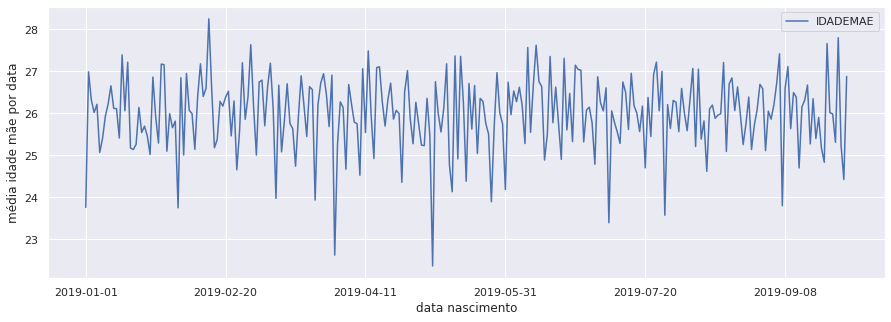

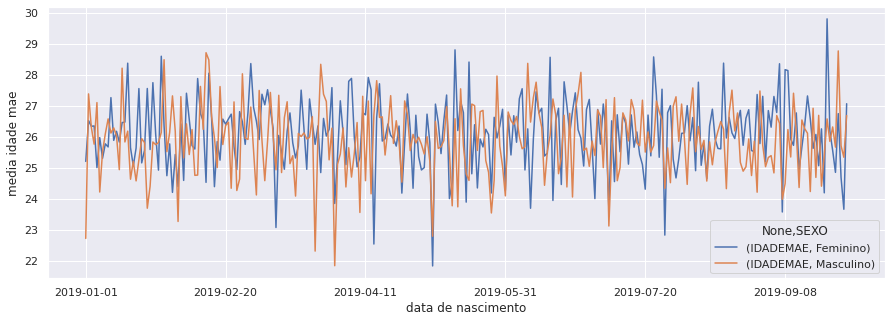

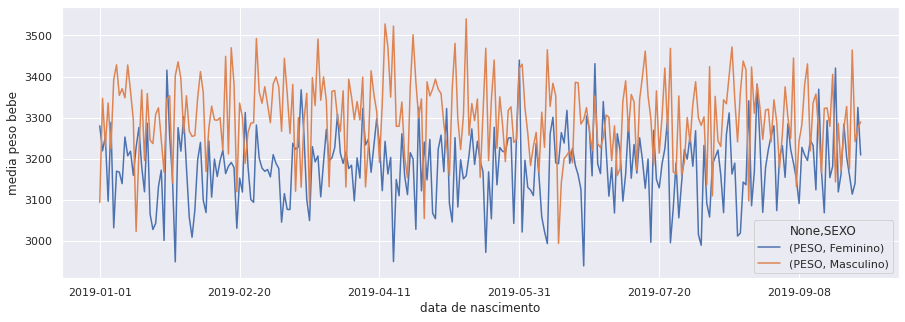

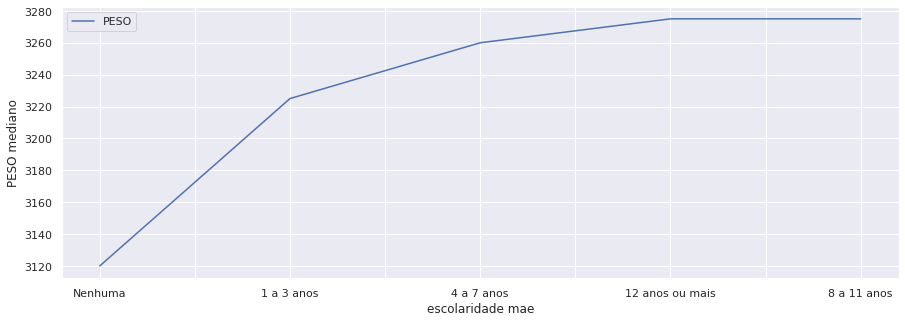

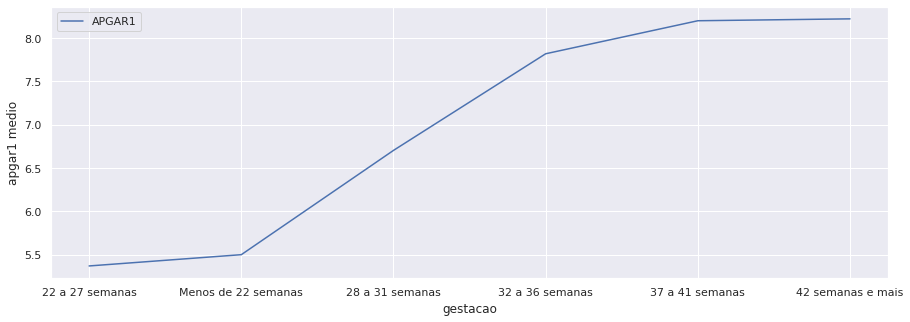

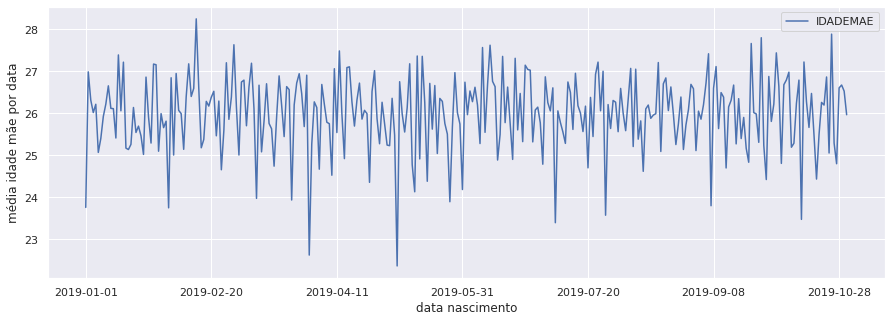

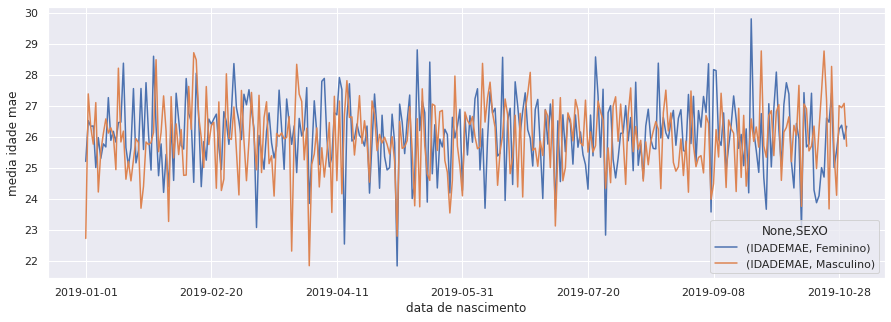

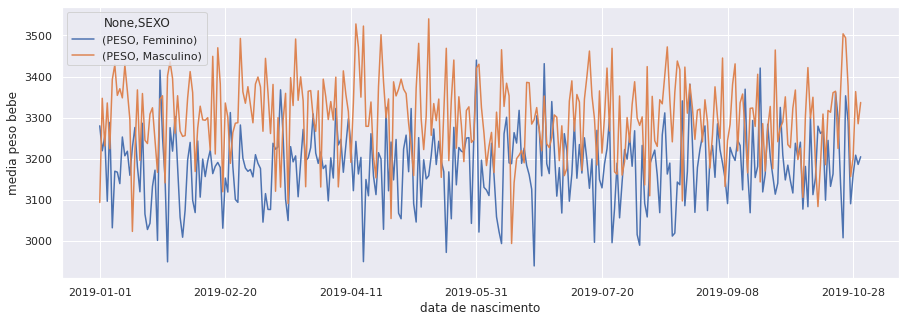

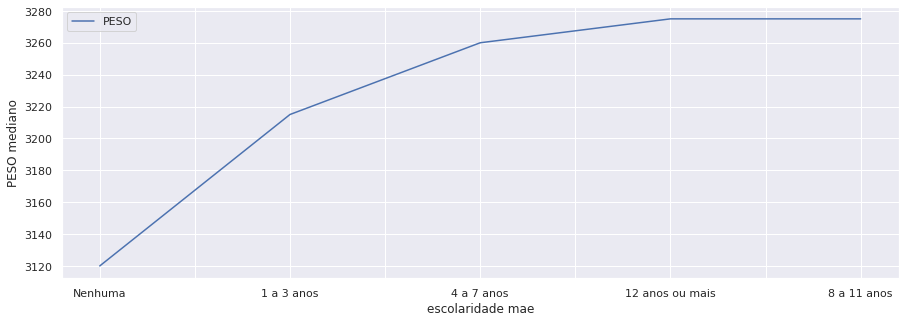

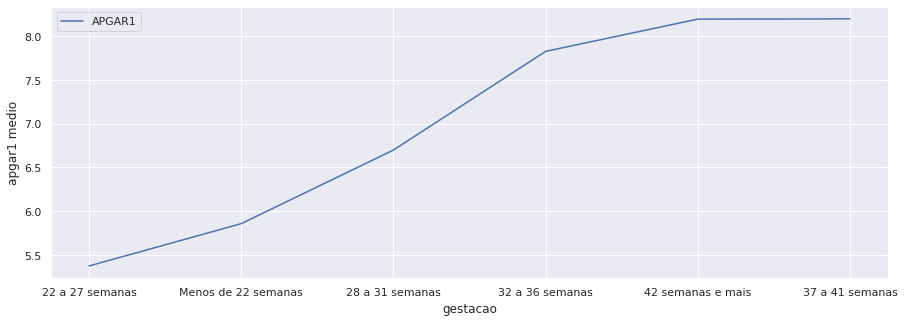

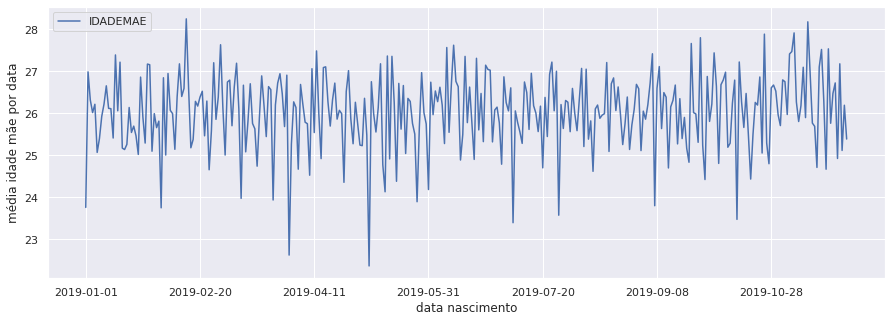

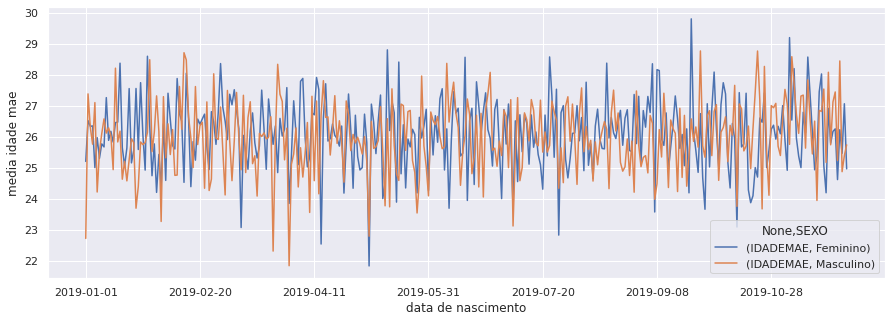

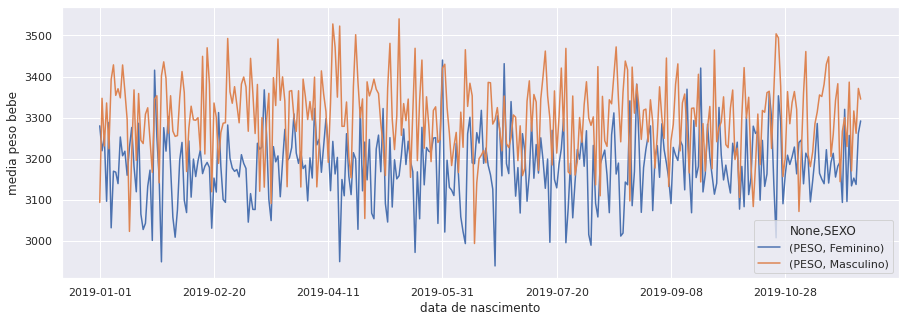

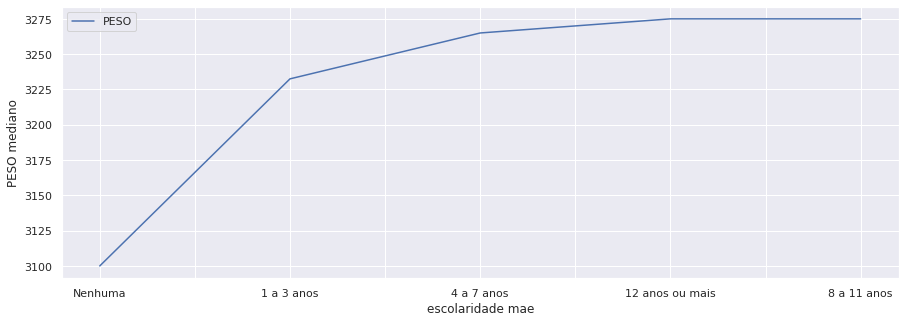

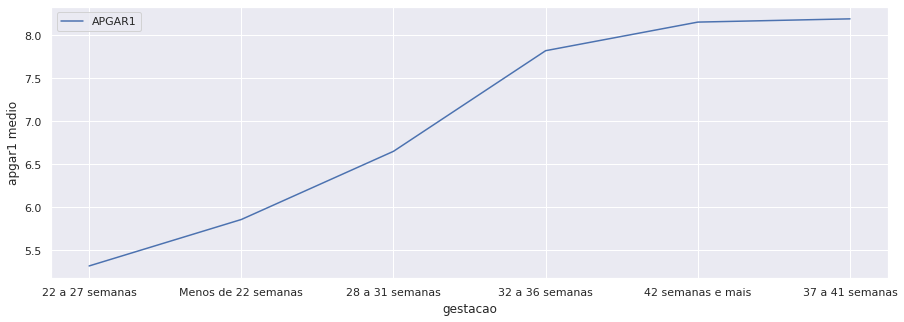

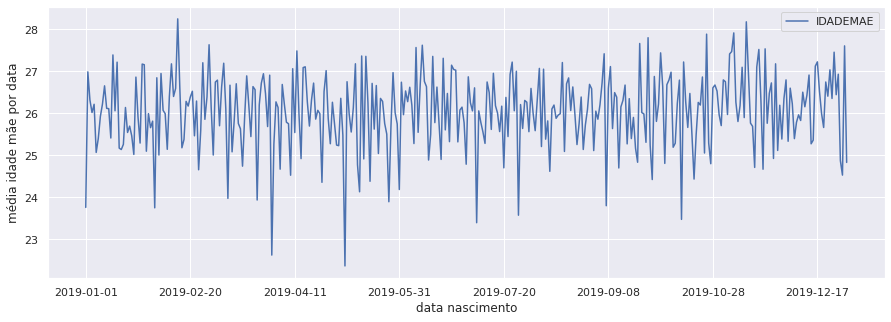

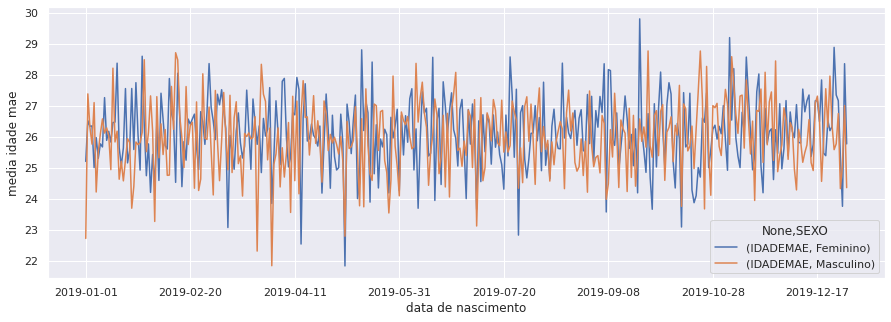

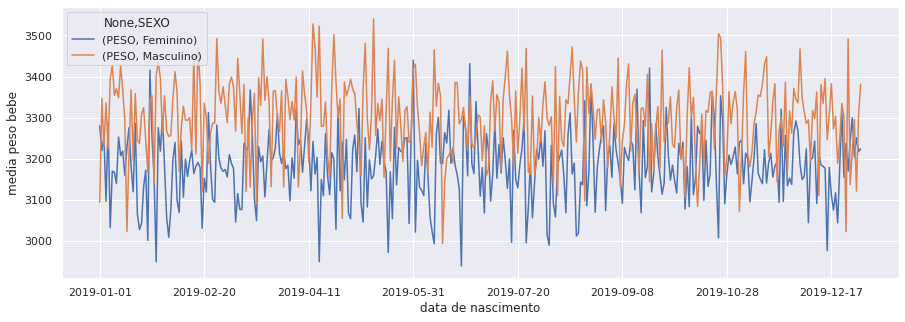

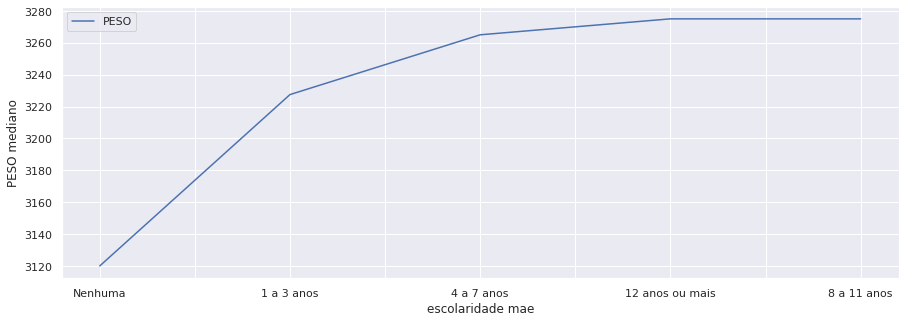

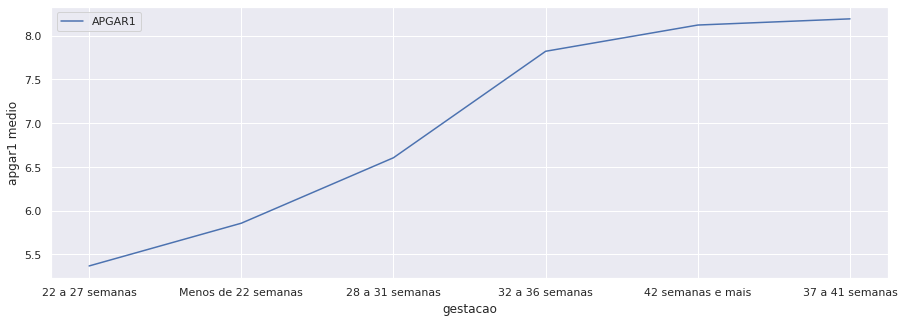

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao = 'nada', arquivo = 'nada', folder = 'nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if (pasta != 'nada'):
        plt.savefig(folder + arquivo + '.png')
    return None

anos = ['2019']
meses = [ 'JAN', 'FEV', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL', 'AGO', 'SET', 'OUT', 'NOV', 'DEZ']

listas =  [ 
    ['IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento', 'nada' , 'media idade mae por data'],
    ['IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack', 'media idade mae por sexo'],
    ['PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack', 'media peso bebe por sexo'],
    ['PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort', 'mediano por escolaridade mae'],
    ['APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort', 'media apgar1 por gestacao']
          ]

pasta_input = './Mod14/input/'
pasta_out = './Mod14/output/figs/'


for ano in anos:
    for mes in meses:
        arquivo_ler = 'SINASC_RO_' + ano + '_' + mes + '.csv'
        sinasc = pd.read_csv(pasta_input + arquivo_ler)
        max_data = sinasc.DTNASC.max()[:7]
        pasta = pasta_out + max_data + '/'
        os.makedirs(pasta, exist_ok=True)
        for lista in listas:
            plota_pivot_table(sinasc, lista[0], lista[1], lista[2], lista[3], lista[4], lista[5], lista[6], pasta)